# Análise exploratória do Dataset Iris

Importando as Bibliotecas necessária:

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Fazendo leitura dos dados

In [48]:
df_iris = pd.read_csv('iris.data', names=['Sépala Comprimento(cm)', 'Sépala Largura(cm)','Pétala Comprimento(cm)', 'Pétala Largura(cm)', 'Classificação'])
df_iris.head()


,Sépala Comprimento(cm),Sépala Largura(cm),Pétala Comprimento(cm),Pétala Largura(cm),Classificação
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Verificando se há dados nulos ou faltantes:

In [52]:
print(df_iris.isnull().sum())
print(df_iris.isna().sum())

Sépala Comprimento(cm)    0
Sépala Largura(cm)        0
Pétala Comprimento(cm)    0
Pétala Largura(cm)        0
Classificação             0
dtype: int64
Sépala Comprimento(cm)    0
Sépala Largura(cm)        0
Pétala Comprimento(cm)    0
Pétala Largura(cm)        0
Classificação             0
dtype: int64


In [49]:
df_iris['Classificação'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classificação, dtype: int64

### Mínimos, Médias, Máximos e Desvio Padrão


Através dos máximos, médias e mínimos, é possível observar que para cada variável (características da Iris) há um deslocamento na concentração de dados para os diferentes tipos de Iris. Já através do desvio padrão, observa-se que a maior parte dos dados está mais homogêneo.

In [58]:
sts_pet_C = df_iris.groupby('Classificação').agg({'Pétala Comprimento(cm)': ['min','mean','max','count','std']})
sts_pet_L = df_iris.groupby('Classificação').agg({'Pétala Largura(cm)': ['min','mean','max','count','std']})
sts_sep_C = df_iris.groupby('Classificação').agg({'Sépala Comprimento(cm)': ['min','mean','max','count','std']})
sts_sep_L = df_iris.groupby('Classificação').agg({'Sépala Largura(cm)': ['min','mean','max','count','std']})

print(sts_pet_C)
print(sts_pet_L)
print(sts_sep_C)
print(sts_sep_L)

                Pétala Comprimento(cm)                            
                                   min   mean  max count       std
Classificação                                                     
Iris-setosa                        1.0  1.464  1.9    50  0.173511
Iris-versicolor                    3.0  4.260  5.1    50  0.469911
Iris-virginica                     4.5  5.552  6.9    50  0.551895
                Pétala Largura(cm)                            
                               min   mean  max count       std
Classificação                                                 
Iris-setosa                    0.1  0.244  0.6    50  0.107210
Iris-versicolor                1.0  1.326  1.8    50  0.197753
Iris-virginica                 1.4  2.026  2.5    50  0.274650
                Sépala Comprimento(cm)                            
                                   min   mean  max count       std
Classificação                                                     
Iris-setosa        

### Boxplot

Observa-se poucos outliers ou nenhum nas variáveis. De forma mais clara, nota-se essa concentração distinta dos dados de acordo com a classificação da Iris.

<function matplotlib.pyplot.show(close=None, block=None)>

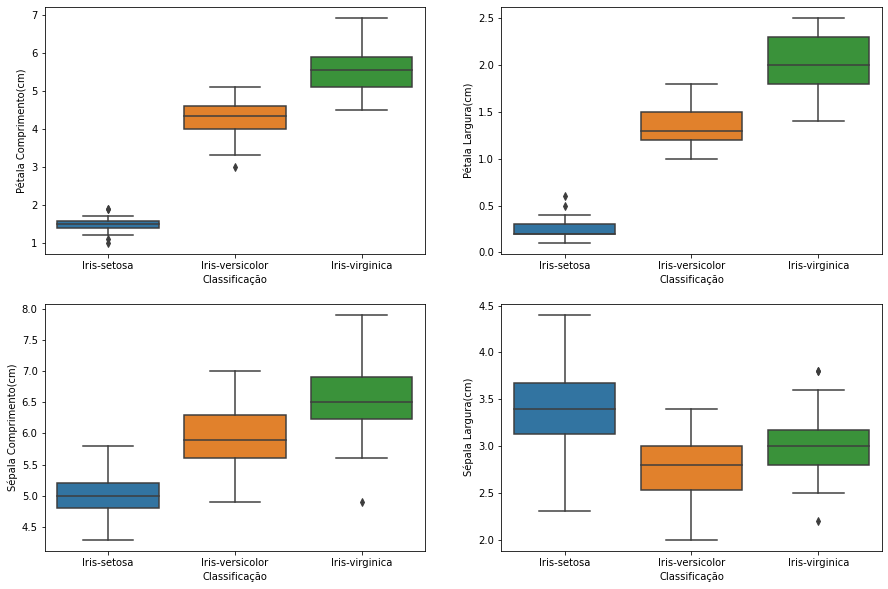

In [40]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(ax=axs[0, 0], data=df_iris, x='Classificação', y='Pétala Comprimento(cm)')
sns.boxplot(ax=axs[0, 1], data=df_iris, x='Classificação', y='Pétala Largura(cm)')
sns.boxplot(ax=axs[1, 0], data=df_iris, x='Classificação', y='Sépala Comprimento(cm)')
sns.boxplot(ax=axs[1, 1], data=df_iris, x='Classificação', y='Sépala Largura(cm)')
plt.show

### Gráfico de dispersão

Correlacionando as variáveis entre sí através do gráfico de dispersão, fica bem evidente o quão está bem definido o grupo da sentosa dos demais, mas apesar de haver algumas mesclagens entre versicolor e virginica ainda é possível ter noção da área desses grupos na maior parte das correlações, apenas altura vs comprimento da sépala que não há uma distribuição tão diferente entre essas duas espécies.

Analisando a distribuição das éspécies nas variáveis, nota-se:

- Sépala Comprimento: Há uma diferenciação mais definida entre a iris sentosa e virginica, sendo a sentosa com menor comprimento da sépala e a virginica com maior, mas a versicolor está mesclada com um comprimento médio entre as duas outras espécies;
- Sépala Largura: A versicolor e virginica tem larguras parecidas, já a iris sentosa tem uma tendência a ter uma largura maior;
- Pétala comprimento: a iris setosa possui um comprimento menor que as demais sendo bem definida essa característica. Há ainda alguns comprimentos em comum entre a versicolor e virginica, mas em sua maioria a virgnica possui um comprimento maior;
- Pétala Largura: A características da largura seguem na mesma proporcionalidade do comprimento entre as espécies.


###### Algumas conclusões:

 - A iris setosa é quem se diferencia melhor entre as espécies tendo a área de suas pétala e o comprimento da sépala menor;
 - A iris versicolor em média tem uma área de suas pétalas e sépalas maior que setosa e menor que a virginica;
 - A iris virginica é quem tem uma área maior tanto nas sépalas quanto nas pétalas entre as três espécies.

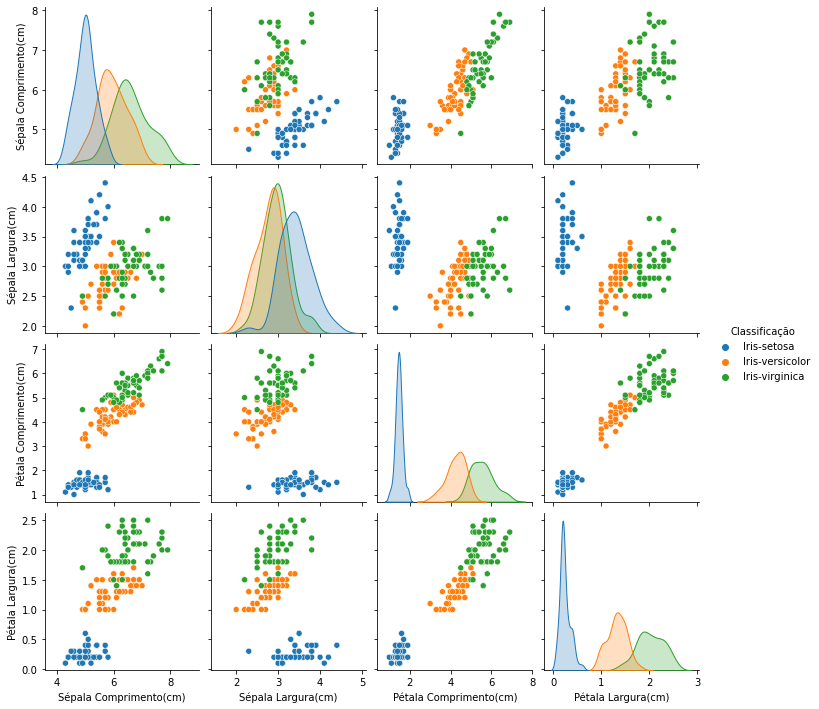

In [11]:
sns.pairplot(df_iris, hue='Classificação')